# W2M6 - Docker 이미지를 AWS EC2에 배포하기
---

#### 학습목표
- 당신의 첫 Data Product (prototype) 배포하기
    - Local에서 docker container image를 만들어서 AWS EC2에 배포해 본다.
    - 자신이 만든 Data Product을 다른 사람이 사용할 수 있도록 배포한다.

#### 사전지식
#### 기능요구사항
- AWS EC2에 배포된 후에 서버 주소 (public DNS name)로 들어가면 JupyterLab 인터페이스가 실행되어야 합니다.
- 해당 화면에서 W1에서 만들었던 Jupyter notebook을 선택해서 실행할 수 있어야 합니다.


#### 프로그래밍관점
#### AWS계정 만들기
- gmail에서 새로운 이메일을 생성하세요. (추천: aws.danolee@gmail.com 처럼 aws.을 prefix로 사용하는 계정을 만들어서 사용하면 편합니다.)
- 새로 생성한 이메일로 aws 계정을 생성하세요. 새로운 계정에서 free-tier EC2 인스턴스를 12개월 동안 무료로 사용할 수 있습니다.

#### AWS free-tier EC2 생성하기
- free-tier EC2 인스턴스를 생성하세요.
- 반드시 User-data를 사용해서 Docker를 설치하고 구성하세요.

#### Docker 이미지 생성하기
- Local에서 Docker Desktop을 이용해서 AWS EC2에 배포할 docker container image를 생성하세요.
    - 어떤 OS를 선택해야 할까요?
    - 어떤 소프트웨어를 설치해야 할까요?
    - 어떤 화일을 담아야 할까요?

#### Docker Image 배포하기
- AWS ECR (Elastic Container Registry)에 Docker container image를 push하세요.
- EC2에서 container image를 pull하세요.

#### 시청결과 및 동작예시
- Jupyter notebook을 실행할 수 있어야 합니다.

#### 팀 활동견적
- Docker를 사용하는 이유가 뭘까요?
- 어떤 점은 더 불편한가요?
- 이번 미션에서는 하나의 EC2에 하나의 Docker container를 배포했습니다. 만약에 여러대의 EC2에 여러 개의 컨테이너를 배포해야 한다면 어떻게 해야 할까요

---

#### 내가 해야하는 것

- [✔️] Gmail 계정 생성 (with prefix) 
    - aws.hxxjaewoong17@gmail.com
- [✔️] free-tier EC2 인스턴스 생성
    - hxxjaewoong17_softeer
- [✔️] User-data 사용해서 Docker 설치 및 구성
    - 밑에 셀 참고
- [✔️] Local에서 Docker Desktop을 이용해서 AWS EC2에 배포할 Docker Container image 생성
    - 밑에 셀 참고
- [✔️] AWS ECR에 Docker container image push
- [✔️] EC2에서 Container image pull
- [✔️] 로컬에서 Jupyter notebook 실행되는지 확인 (public DNS name에서 jupyetLab 인터페이스가 실행되는지)
    - public DNS: 54.180.102.117
- [✔️] 다른 사람이 사용할 수 있는지 확인하기

---

# User Data 사용해서 Docker 설치 및 구성하기

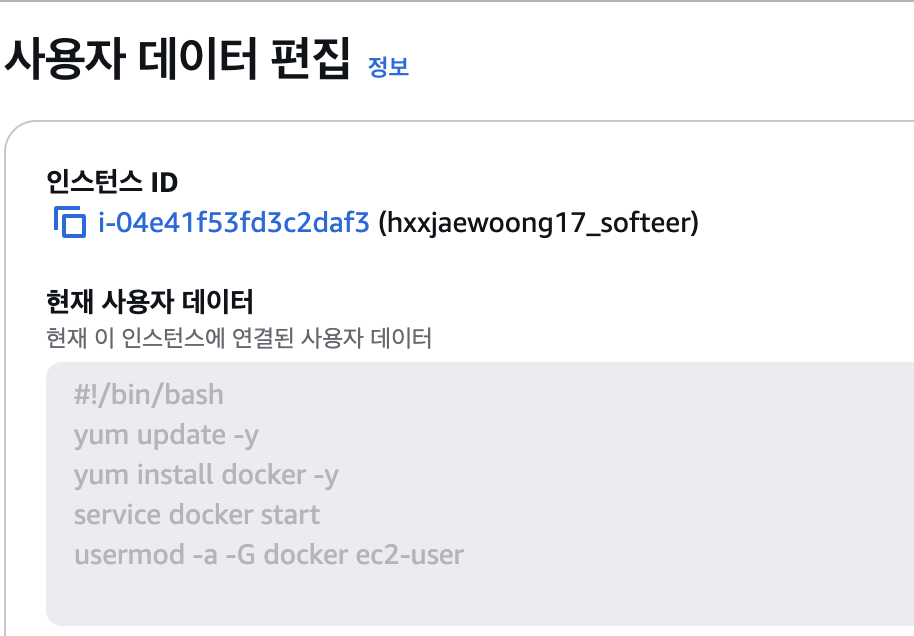

# Docker build

### 기본
<u>명령어</u>  
docker build -t jupyterlab-image .


### 아키텍처 호환이 되지 않을 때
<u>명령어</u>  
docker buildx create --use
docker buildx build --platform linux/amd64 -t < ECR REPO: Tag > --push .

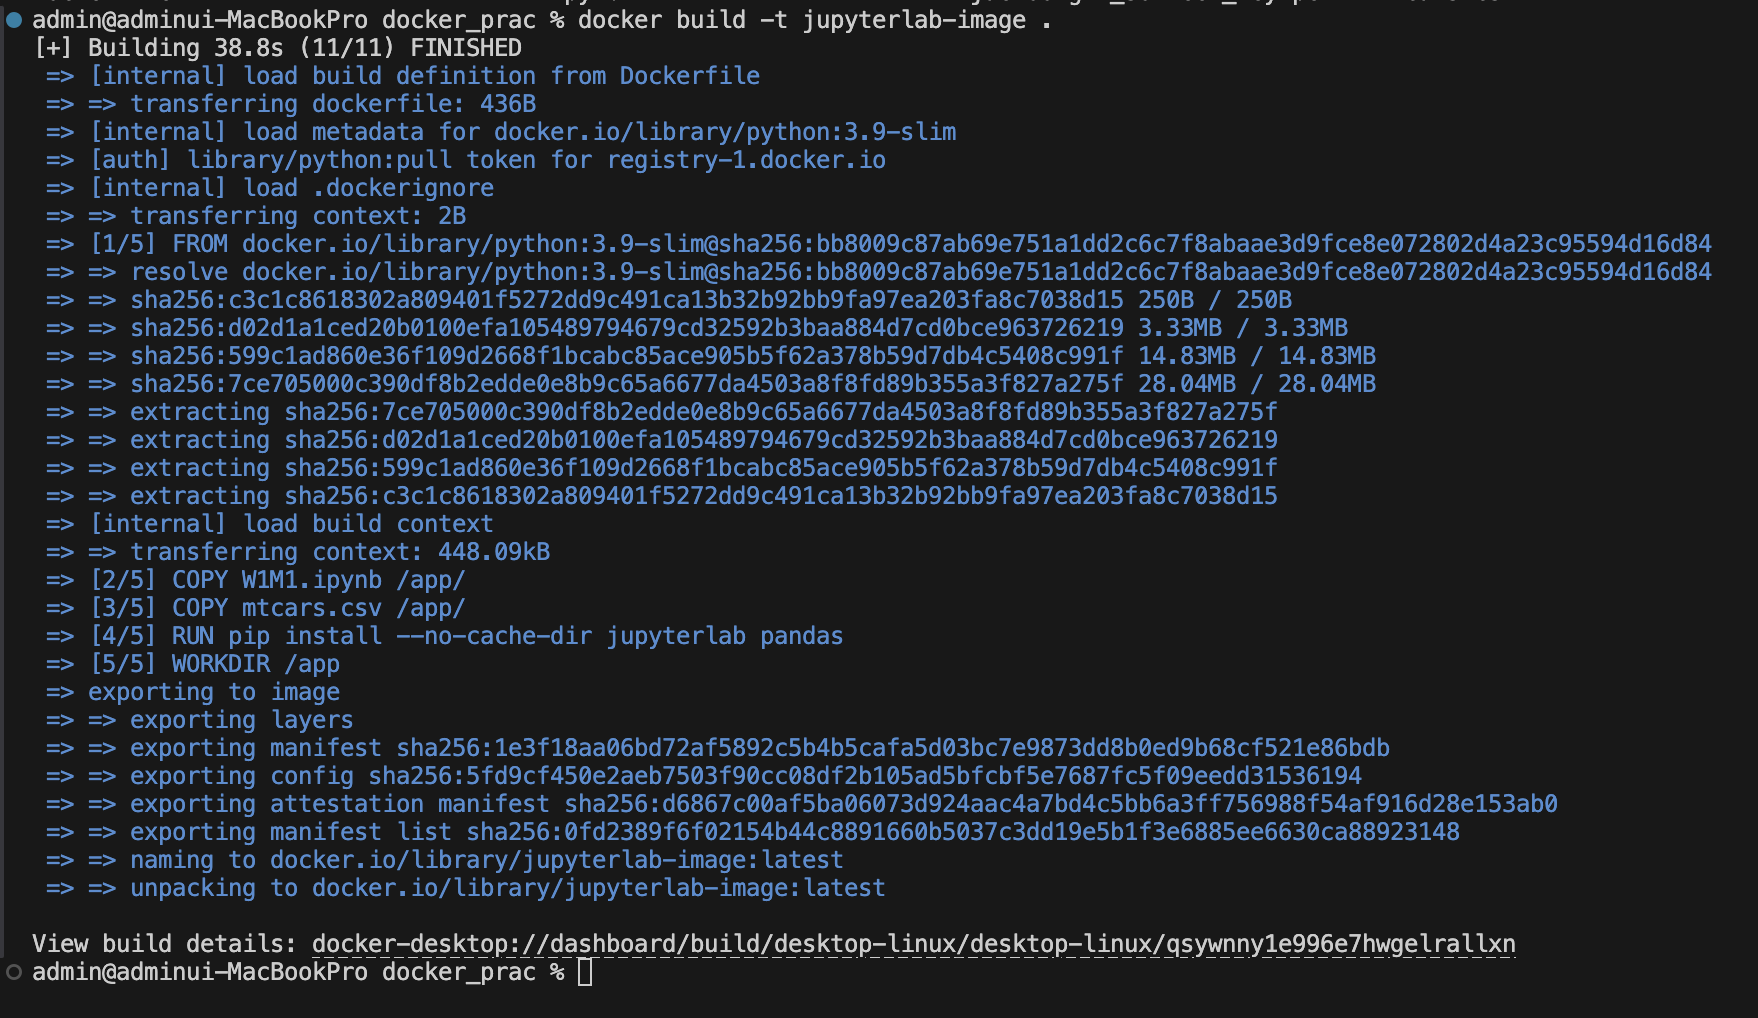

# 로컬에서 실행 되는지 확인
명령어: docker run -p 8888:8888 jupyterlab-image

# hyundaisofteer에 대한 푸시 명령 (ECR을 이용한 push)

1. 인증 토큰을 검색하고 레지스트리에 대해 Docker 클라이언트를 인증합니다. 다음 AWS CLI을(를) 사용하세요. (로그인)
- **login succeed 가 떠야함**

2. 다음 명령을 사용하여 도커 이미지를 빌드합니다. 이미지를 이미 빌드한 경우에는 이 단계를 건너뛸 수 있습니다.
- docker build -t hyundaisofteer .

3. 빌드가 완료되면 이미지에 태그를 지정하여 이 리포지토리에 푸시할 수 있습니다.
- docker tag < Tag > < ECR REPO >

4. 다음 명령을 실행하여 이 이미지를 새로 생성한 AWS 리포지토리로 푸시합니다.
- docker push < ECR REPO >

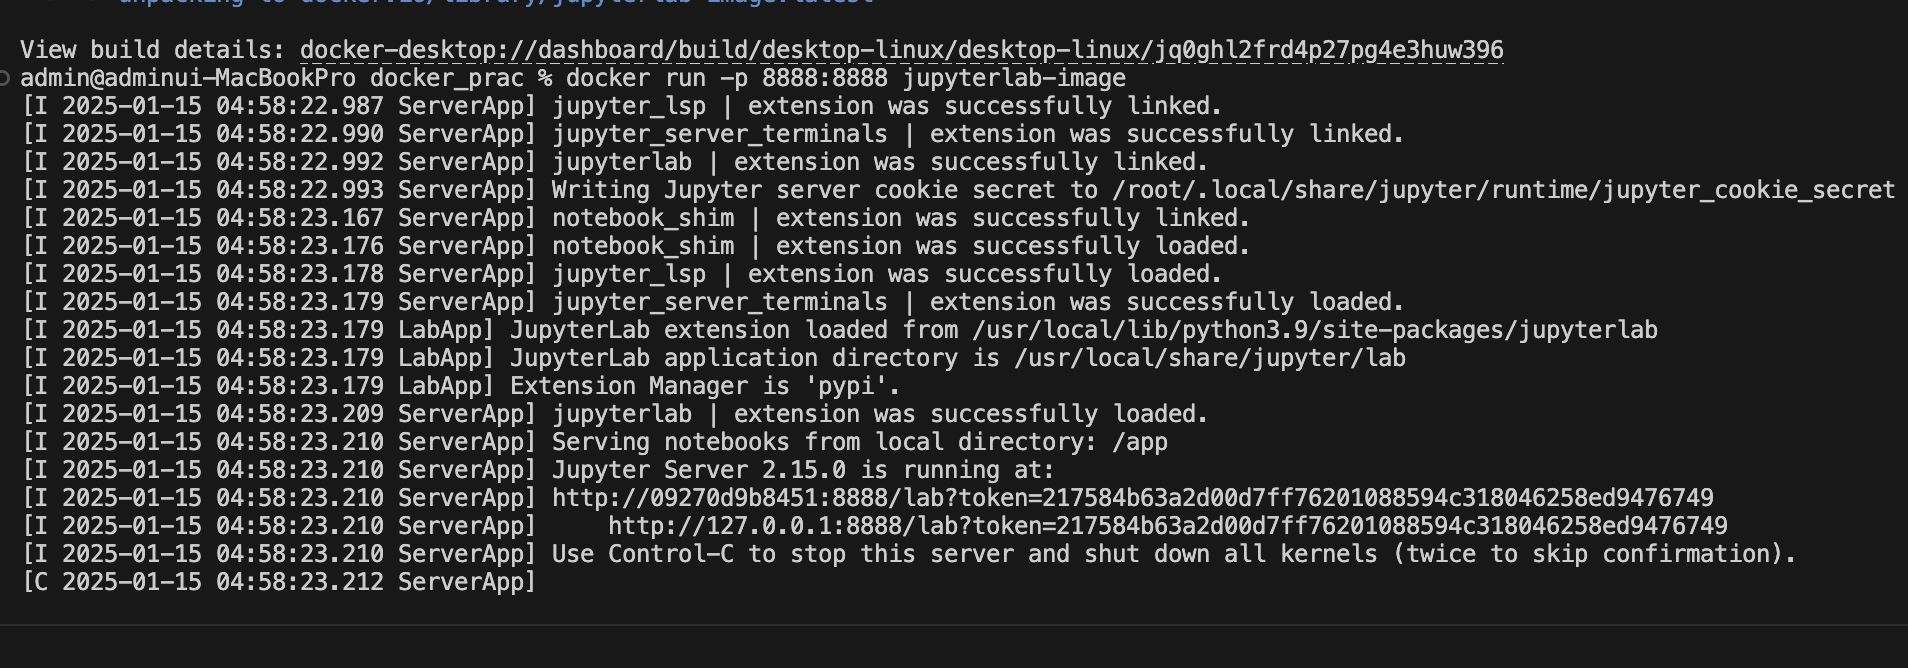

# SSH를 이용해 EC2 접속

**명령어**  
- ssh -i "< key >" ec2-user@ec2-< DNS >.ap-northeast-2.compute.amazonaws.com

**로그인 해야함 !**

# EC2에서 Pull 진행 후 실행 해보기

### EC2에서 Pull
**명령어**  
docker pull < ECR REPO >

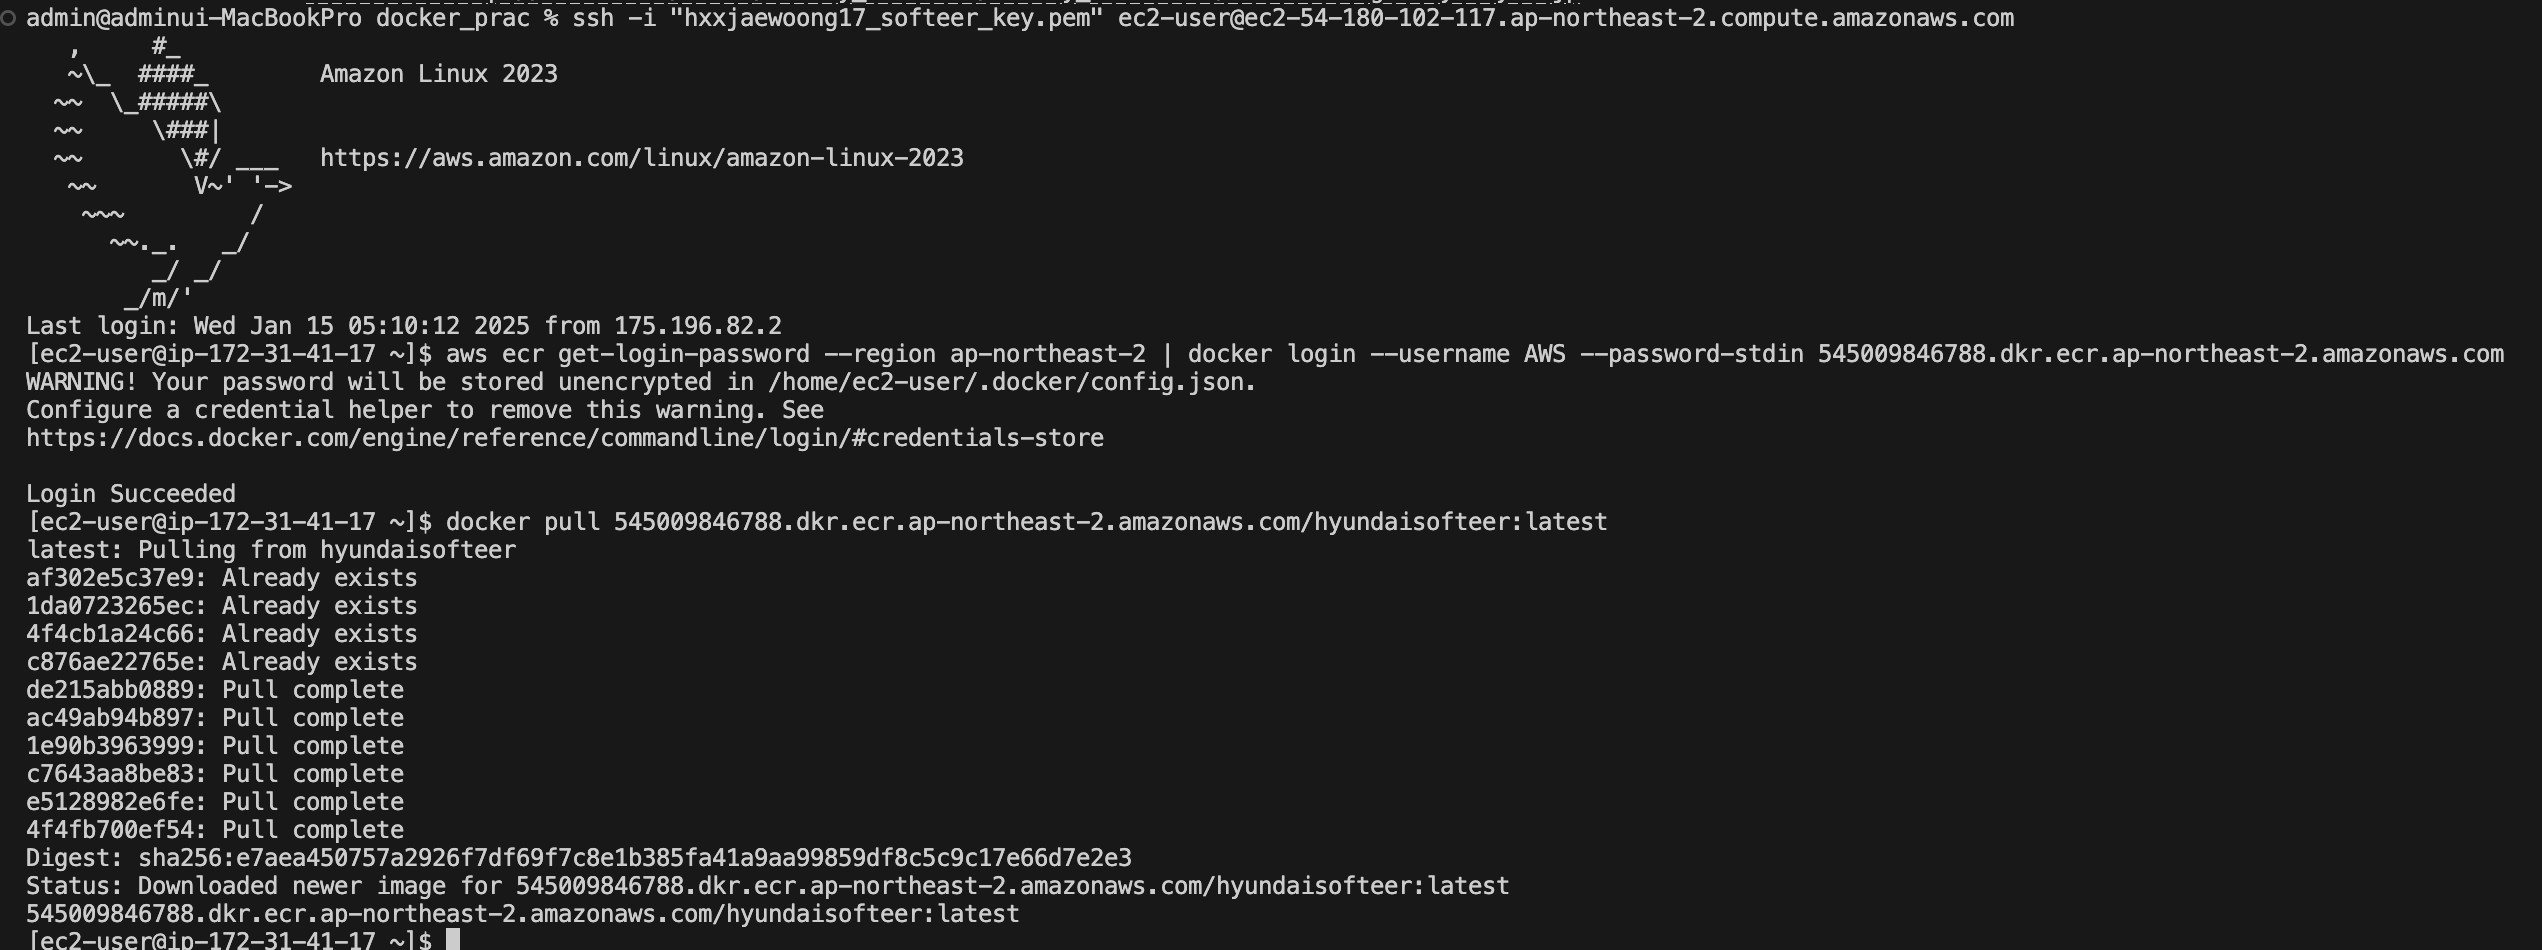

### EC2에서 실행해보기

##### 명령어  
- docker run -d -p 8888:8888 < ECR REPO >

##### 내 DNS 서버  
- http://<EC2_PUBLIC_DNS>:8888

##### Token이 필요할 시
- docker ps로 container id를 확인
- docker exec -it <CONTAINER_ID> jupyter server list 로 토큰을 받아서 입력하면 해결 가능 !


#### 결과 : 성공 😩😩😩

---

# 팀 활동 요구사항
1. Docker를 사용하는 이유가 뭘까요?
2. 어떤 점은 더 불편한가요?
3. 이번 미션에서는 하나의 EC2에 하나의 Docker container를 배포했습니다. 만약에 여러대의 EC2에 여러 개의 컨테이너를 배포해야 한다면 어떻게 해야 할까요?

> Docker를 사용하는 이유가 뭘까?
>> 나의 의견
1. 일관된 환경으로 애플리케이션 개발 및 배포 가능 
소프트웨어 개발 협업을 할 때, 주로 소스코드를 공유하여 애플리케이션을 공동개발을 한다. 그러나, 개발자가 사용하는 런타임 환경을 다를 수 있으므로, 런타임 환경은 별도로 맞춰야 하는 단점이 있다. 도커를 이용한다면, 소스코드뿐만 아니라, 런타임 환경 자체도 같이 배포하는 효과를 볼 수 있어, 표준화된 개발환경을 공유하여 개발 및 배포가 가능하다.

2. 반응형 배포 및 확장
도커를 사용하면 데스크톱, 랩탑, 데이터센터, 가상 머신 등을 고려하지 않고 배포 가능하다. 또한, 애플리케이션 사용자가 급격하게 증가하거나 감소하였을 경우, 유동적으로 서버를 확장 및 축소 가능하여, 워크로드를 조정할 수 있다.

3. 동일한 하드웨어에서 더 많은 워크로드 실행
하이퍼바이저 기반 가상화는 가상 머신이 구동되고 이를 하이퍼바이저가 관리하는 구조이므로 컴퓨터 리소스를 많이 사용한다. 도커는 컨테이너 기반 가상화로 애플리케이션을 구동하므로, 컨테이너를 관리하는 데 있어 컴퓨팅 리소스를 하이퍼바이저 가상화보다 적게 사용한다. 그러므로, 도커는 하이퍼바이저 가상화보다 더 많은 애플리케이션을 구동할 수 있는 장점이 있다.

>> 팀원 의견 추가
- 모듈화를 이용한 재활용성도 높아질 것
- 환경을 실행하는데 복잡한 커맨드를 안 짜도 됨
- 컨테이너가 독립되어 있으므로, 다른 컨테이너가 죽어도 다른 컨테이너에게 영향을 주지 않는다
- 버전에 대한 롤백이 용이하다.

> 어떤 점은 더 불편한가?
>> 나의 의견
- Docker와 관련된 개념(Dockerfile, 이미지, 컨테이너, 볼륨, 네트워크 등)을 이해하는 데 시간이 필요하다. 개인적으로 매우 긴 개인 공부 시간을 투자함
- 컨테이너는 VM보다 가볍지만, 네이티브 실행 환경에 비해 성능이 약간 낮을 수도 있을 것 같음 (개인적인 생각) ==> 스케일 인 아웃이 도커가 비교적 어려운 것 같은 단점이 있는 것 같다. (찾아보니까 쉘 파일에서 조정이 가능한 것 같다. 그렇다면 상관 없을 것 같기도?)
- 눈에 직접적으로 보이지 않아서 (GUI 부재) 생각보다 어려웠다.

> 이번 미션에서는 하나의 EC2에 하나의 Docker container를 배포했습니다. 만약에 여러대의 EC2에 여러 개의 컨테이너를 배포해야 한다면 어떻게 해야 할까?
>> 나의 의견
- 여러 컨테이너를 단일 EC2 인스턴스에서 쉽게 관리할 수 있는 Docker Compose 가 있다고 한다.
- Kubernetes라는 업계 도구가 있다고 함


---